<img src="https://images.pexels.com/photos/248152/pexels-photo-248152.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" width=600>

## Classification Case Study

The researchers at SABIC Innovative Plastics US are working on refining the manufacturing process for new polymers. Creating this polymer involves combining 12 materials and 45 mechanical processes (order of processes is unimportant). The prices of ingredients vary as do the amount of time needed for each process done by individual machines that would otherwise be used to make other products. The CSuite requires a pared down list of materials and processes before polymers can go to market. 

A polymer yield greater than or equal to 41 grams is considered "high".

You will use logistic regression to create a classification model find the material and process combination that produces high yield.

### Business Problem

#### End Users:

- Scientists, budgeting department, CSuite

#### True business problem:

- Create a model that can, if given data from from repeated chemical manufacturing trials, predict if the polymer yield will be high (worth the money). 

#### Context:

- **False negative** in this context: Predicts that an actually high-yield combination will be low yield.
    - **Outcome**: Missed polymer opportunity
    
- **False positive** in this context: Predicts that an actually low-yield combination will be high yield.

    - **Outcome**: Unreliable formula. Takes longer to go to market. Potential company waste.

#### Evaluation 

Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- **Accuracy**
- **Precision**
- Recall
- F1-Score

We can focus on accuracy for ease of use, but should also be maximizing our Precision score and minimizing False Positives, because false positives are a much more costly mistake than false negatives.

## Import necessary packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

from IPython.display import display, HTML

## Read in data & take a look

In [2]:
df = pd.read_csv('data/ChemicalManufacturingProcess.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Yield                   176 non-null    float64
 1   BiologicalMaterial01    176 non-null    float64
 2   BiologicalMaterial02    176 non-null    float64
 3   BiologicalMaterial03    176 non-null    float64
 4   BiologicalMaterial04    176 non-null    float64
 5   BiologicalMaterial05    176 non-null    float64
 6   BiologicalMaterial06    176 non-null    float64
 7   BiologicalMaterial07    176 non-null    float64
 8   BiologicalMaterial08    176 non-null    float64
 9   BiologicalMaterial09    176 non-null    float64
 10  BiologicalMaterial10    176 non-null    float64
 11  BiologicalMaterial11    176 non-null    float64
 12  BiologicalMaterial12    176 non-null    float64
 13  ManufacturingProcess01  175 non-null    float64
 14  ManufacturingProcess02  173 non-null    fl

In [4]:
df.head()

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3.0,7.2,NaN,NaN,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2.0,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2.0,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2.0,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2.0,7.3,0.0,0.00,11.0,1.1,1.7,2.1


## Train test split

Encode `Yield` into `1/0` depending on if it's equal or greater than 41.

In [5]:
# train test split

X = df.drop(columns = ['Yield'])
y = (df['Yield'] >= 41).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Preprocessing pipeling
- impute missing values in columns
- scale using max absolute value (this was chosen after trial and error with other scalers)

In [6]:
# Pipeline preprocessing
imp = SimpleImputer(missing_values=np.nan, strategy='median')
mscale = MaxAbsScaler()

prep = [('imputer', imp), ('scaler', mscale)]

pipe = Pipeline(prep)

In [7]:
pipe.fit(X_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MaxAbsScaler())])

In [8]:
X_train_prepped = pipe.transform(X_train)

## Create logistic regression model
Using *all* variables. 

In [9]:
lgrg1 = LogisticRegression(random_state = 100)

In [10]:
lgrg1.fit(X_train_prepped, y_train)

LogisticRegression(random_state=100)

In [11]:
y_train_pred = lgrg1.predict(X_train_prepped)

## Evaluate
Check the accuracy of the model. <br>
Remember, `sklearn` uses a threshold cutoff of `0.5`

In [12]:
accuracy_score(y_train, y_train_pred)

0.8106060606060606

## But is that the **BEST** cutoff?

- get predicted probabilities using `X_train_prepped`
- use `pipe` to transform `X_test`
- predict `y_test_pred_probs` using `lgrg1`

In [13]:
# get predicted probabilities (log odds) from model for train set
y_train_pred_probs = lgrg1.predict_proba(X_train_prepped)[:, 1]

In [14]:
y_train_pred_probs

array([0.19899734, 0.7487307 , 0.09875212, 0.23671762, 0.06899185,
       0.27428172, 0.20027379, 0.1357566 , 0.28614375, 0.13354479,
       0.35422872, 0.24256474, 0.23296297, 0.68193895, 0.26190186,
       0.17237784, 0.18049278, 0.13024803, 0.07892048, 0.08570878,
       0.57998956, 0.70651709, 0.29826076, 0.32127245, 0.54918073,
       0.44858864, 0.14232781, 0.24417139, 0.28258606, 0.54981371,
       0.23996388, 0.43726506, 0.19081646, 0.23221412, 0.29390105,
       0.44376531, 0.5923291 , 0.1347838 , 0.2038909 , 0.68786784,
       0.22663491, 0.30699124, 0.55218176, 0.24283436, 0.25169143,
       0.23341945, 0.1802082 , 0.6793839 , 0.07876625, 0.07301221,
       0.08461758, 0.13518663, 0.07382558, 0.46748777, 0.1020619 ,
       0.23232227, 0.10322598, 0.35669753, 0.19133618, 0.26892033,
       0.28539788, 0.30566919, 0.28861568, 0.32674538, 0.26906023,
       0.09706153, 0.19950256, 0.26520216, 0.45860326, 0.80517473,
       0.25892161, 0.69002799, 0.08602919, 0.49254192, 0.61957

In [15]:
y_train_compare = pd.DataFrame([y_train.reset_index()['Yield'], y_train_pred]).T.set_index(y_train.index).rename(columns={"Yield":"Actual", "Unnamed 0":"Predicted"})

In [16]:
y_train_compare.head()

,Actual,Predicted
142,0,0
2,1,1
100,0,0
122,1,0
153,0,0


In [17]:
len(y_train_pred_probs)

132

In [18]:
y_train_pred_probs_df = pd.DataFrame(y_train_pred_probs, columns=['Predicted Probability'], index=y_train.index)

In [19]:
y_train_outcomes = pd.concat([y_train_compare, y_train_pred_probs_df], axis=1)

In [20]:
y_train_outcomes.head()

,Actual,Predicted,Predicted Probability
142,0,0,0.198997
2,1,1,0.748731
100,0,0,0.098752
122,1,0,0.236718
153,0,0,0.068992


In [21]:
# Transform X_test
X_test_transformed = pipe.transform(X_test)

# Get probabilites
y_test_pred_probs = lgrg1.predict_proba(X_test_transformed)[:, 1]

In [22]:
# now you, hypothetical reader, should try to do the same as above but for the test set!

Use `for` loop to iterate over various thresholds and calculate the accuracy for both train and test.

In [22]:
metrics_df = pd.DataFrame(columns=['threshold', 'train_acc', 'test_acc', 'train_prec', 'test_prec',
                                   'train_rec', 'test_rec', 'train_f1', 'test_f1'])

for x in np.arange(y_train_pred_probs.min(), y_train_pred_probs.max(), 0.01):
    placeholder = []
    threshold = x
    
    y_pred_train = np.where(y_train_pred_probs > x, 1, 0)
    y_pred_test = np.where(y_test_pred_probs > x, 1, 0)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    train_prec = precision_score(y_train, y_pred_train)
    test_prec = precision_score(y_test, y_pred_test)
    
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    
    placeholder = [threshold, train_acc, test_acc, train_prec, test_prec,
                  train_rec, test_rec, train_f1, test_f1]
    sample_S = pd.Series(placeholder, index=[
                         'threshold', 'train_acc', 'test_acc', 'train_prec', 'test_prec',
                         'train_rec', 'test_rec', 'train_f1', 'test_f1'])
    metrics_df = metrics_df.append(sample_S, ignore_index=True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
metrics_df.head()

,threshold,train_acc,test_acc,train_prec,test_prec,train_rec,test_rec,train_f1,test_f1
0,0.049763,0.310606,0.386364,0.305344,0.357143,1.0,1.0,0.467836,0.526316
1,0.059763,0.310606,0.409091,0.305344,0.365854,1.0,1.0,0.467836,0.535714
2,0.069763,0.325758,0.409091,0.310078,0.365854,1.0,1.0,0.473373,0.535714
3,0.079763,0.356061,0.431818,0.320000,0.375000,1.0,1.0,0.484848,0.545455
4,0.089763,0.386364,0.431818,0.330579,0.375000,1.0,1.0,0.496894,0.545455


## **Plot** the results

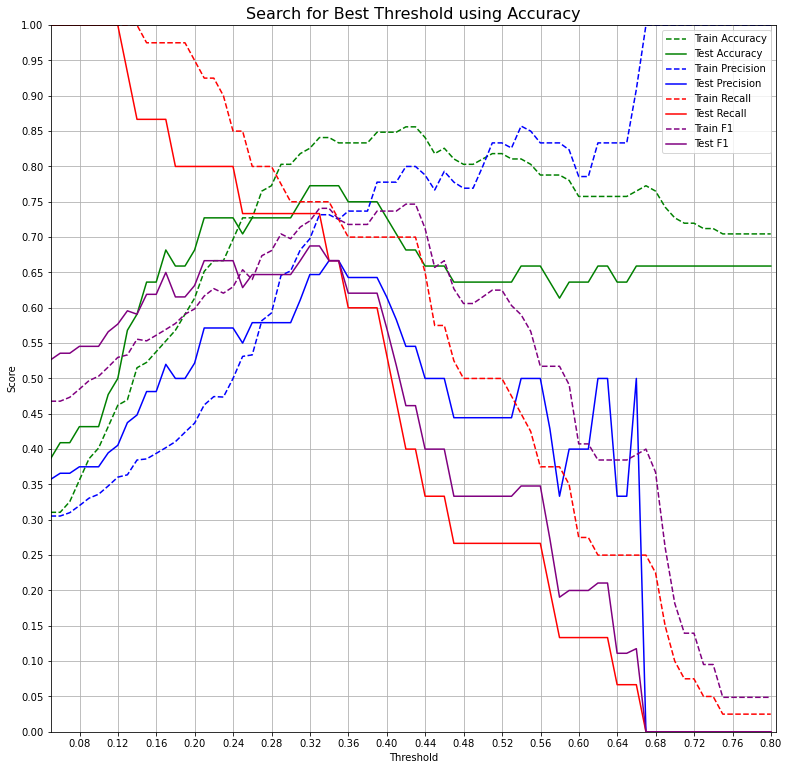

In [25]:
plt.figure(figsize=(13, 13))
plt.title("Search for Best Threshold using Accuracy",
          fontsize=16)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)

ax = plt.gca()
ax.set_xlim(y_train_pred_probs.min(), y_train_pred_probs.max())
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.yaxis.set_major_locator(MaxNLocator(20))

# Get the regular numpy array from the MaskedArray
X_axis = np.array(metrics_df['threshold'], dtype=float)

ax.plot(X_axis, metrics_df['train_acc'], ls='--',
        color='g', label='Train Accuracy')
ax.plot(X_axis, metrics_df['test_acc'], ls='-',
        color='g', label='Test Accuracy')

ax.plot(X_axis, metrics_df['train_prec'], ls='--',
        color='b', label='Train Precision')
ax.plot(X_axis, metrics_df['test_prec'], ls='-',
        color='b', label='Test Precision')

ax.plot(X_axis, metrics_df['train_rec'], ls='--',
        color='r', label='Train Recall')
ax.plot(X_axis, metrics_df['test_rec'], ls='-',
        color='r', label='Test Recall')

ax.plot(X_axis, metrics_df['train_f1'], ls='--',
        color='purple', label='Train F1')
ax.plot(X_axis, metrics_df['test_f1'], ls='-',
        color='purple', label='Test F1')

plt.legend()

## Question:

- Is `.5` the best cutoff?
- What is the best choice?
- Why?

-----

## **Advanced** Questions (Optional):

- While you're able to predict high yield, are you able to produce a reduced process/materials list?
- How would you adjust the `LogisticRegression` arguments to produce a reduced list?
- Is the model "done"? How would you check to see if multi-collinearity is an issue?

In [26]:
# Check Coefficients
coef_dict = {}
for coef, feat in zip(list(lgrg1.coef_[0]),X_train.columns.tolist()):
    coef_dict[feat] = coef
    
# Convert to dataframe so you can sort it
coef_df = pd.DataFrame.from_dict(coef_dict, columns =['Coef'], orient='index')
coef_df.sort_values(by=['Coef'], ascending = False)

,Coef
ManufacturingProcess12,1.190825
BiologicalMaterial06,0.653541
ManufacturingProcess32,0.645925
ManufacturingProcess11,0.617126
BiologicalMaterial02,0.576376
ManufacturingProcess30,0.562880
BiologicalMaterial05,0.493133
BiologicalMaterial04,0.482429
ManufacturingProcess39,0.439870
ManufacturingProcess43,0.432255


#### Set `C` to 0.02 to increase the penalty and perhaps decrease the variable set

In [27]:
lgrg2 = LogisticRegression(C=.02, random_state = 100)
lgrg2.fit(X_train_prepped, y_train)
y_train_pred_probs = lgrg2.predict_proba(X_train_prepped)[:, 1]
y_test_pred_probs = lgrg2.predict_proba(X_test_transformed)[:, 1]

#### Check - Did this change the thresholds?

In [28]:
metrics_df = pd.DataFrame(columns = ['threshold','train_acc', 'test_acc'])

for x in np.arange(y_train_pred_probs.min(),y_train_pred_probs.max(), 0.01):
    placeholder =[]
    threshold = x
    y_pred_train = np.where(y_train_pred_probs>x,1,0)
    r_pred_test = np.where(y_test_pred_probs>x, 1, 0)
    train_acc = accuracy_score(y_train,y_pred_train)
    test_acc = accuracy_score(y_test,r_pred_test)
    placeholder = [threshold,train_acc, test_acc]
    sample_S = pd.Series(placeholder,index = ['threshold','train_acc', 'test_acc'] )
    metrics_df = metrics_df.append(sample_S, ignore_index = True)

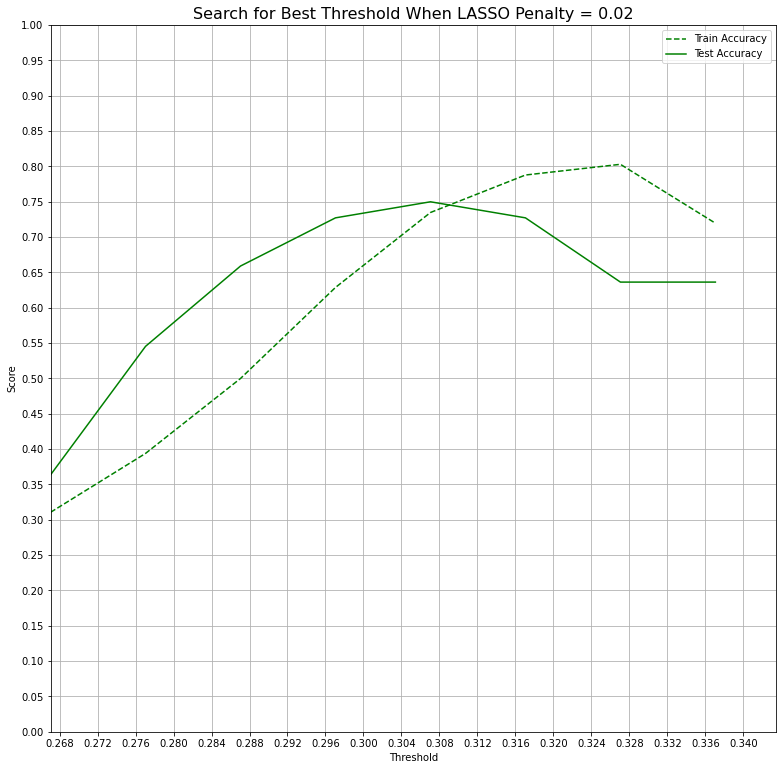

In [30]:
plt.figure(figsize=(13, 13))
plt.title("Search for Best Threshold When LASSO Penalty = 0.02",
          fontsize=16)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)

ax = plt.gca()
ax.set_xlim(y_train_pred_probs.min(), y_train_pred_probs.max())
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.yaxis.set_major_locator(MaxNLocator(20))

# Get the regular numpy array from the MaskedArray
X_axis = np.array(metrics_df['threshold'], dtype=float)

ax.plot(X_axis, metrics_df['train_acc'], ls='--', color='g', label='Train Accuracy')
ax.plot(X_axis, metrics_df['test_acc'], ls='-', color='g', label='Test Accuracy')

plt.legend()

### How did it change the coefficients?

Did any of them move closer to zero so you can give a reduced list of variables to managment?

In [31]:
# Check Coefficients
coef_dict = {}
for coef, feat in zip(list(lgrg2.coef_[0]),X_train.columns.tolist()):
    coef_dict[feat] = coef
    
# Convert to dataframe so you can sort it
coef_df2 = pd.DataFrame.from_dict(coef_dict, columns =['Coef2'], orient='index')
coef_df2.sort_values(by=['Coef2'], ascending = False)

coef_df.merge(coef_df2,left_index=True, right_index = True)

,Coef,Coef2
BiologicalMaterial01,0.395945,0.024190
BiologicalMaterial02,0.576376,0.028918
BiologicalMaterial03,0.409296,0.017414
BiologicalMaterial04,0.482429,0.024705
BiologicalMaterial05,0.493133,0.019439
BiologicalMaterial06,0.653541,0.030086
BiologicalMaterial07,-0.010232,-0.000160
BiologicalMaterial08,0.143973,0.011108
BiologicalMaterial09,-0.159985,-0.003012
BiologicalMaterial10,0.060685,0.012717


In [32]:
coef_df.merge(coef_df2,left_index=True, right_index = True)

,Coef,Coef2
BiologicalMaterial01,0.395945,0.024190
BiologicalMaterial02,0.576376,0.028918
BiologicalMaterial03,0.409296,0.017414
BiologicalMaterial04,0.482429,0.024705
BiologicalMaterial05,0.493133,0.019439
BiologicalMaterial06,0.653541,0.030086
BiologicalMaterial07,-0.010232,-0.000160
BiologicalMaterial08,0.143973,0.011108
BiologicalMaterial09,-0.159985,-0.003012
BiologicalMaterial10,0.060685,0.012717


#### Check for multi-collinearity
(do not need to solve it now, only checking)

In [33]:
df_corr = X_train.corr().stack().reset_index()

# rename the columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']

# create a mask to identify rows with duplicate features as mentioned above
mask_dups = (df_corr[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (df_corr['FEATURE_1']==df_corr['FEATURE_2']) 

# apply the mask to clean the correlation dataframe
df_corr = df_corr[~mask_dups]
df_corr[abs(df_corr['CORRELATION'])>.8]

,FEATURE_1,FEATURE_2,CORRELATION
3,BiologicalMaterial01,BiologicalMaterial04,0.804935
59,BiologicalMaterial02,BiologicalMaterial03,0.847295
62,BiologicalMaterial02,BiologicalMaterial06,0.954811
119,BiologicalMaterial03,BiologicalMaterial06,0.855025
180,BiologicalMaterial04,BiologicalMaterial10,0.921538
296,BiologicalMaterial06,BiologicalMaterial12,0.806741
581,BiologicalMaterial11,BiologicalMaterial12,0.896765
1164,ManufacturingProcess09,ManufacturingProcess13,-0.820640
1222,ManufacturingProcess10,ManufacturingProcess14,-0.830498
1283,ManufacturingProcess11,ManufacturingProcess18,-0.886461
